# Credit Card Default Prediction using Machine Learning

In [3]:
# Objective : Predict the possibilty of default in payment based on payment history.

## 1.Importing necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.Loading the dataset

In [8]:
data=pd.read_csv('credit_card.csv')            # Loading CSV file into dataframe
data.head()                                    # Displaying the first 5 rows

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


## 3.Exploratory Data Analysis and Datapreprocessing

In [10]:
# Correcting the header
data=pd.read_csv('credit_card.csv',header =1)  # header=1 makes the second row as the column headers.
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
data.dtypes           # Displays datatype information

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

### Comment :
All the fileds are of integer type.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### Comment :
Dataset has 30000 rows and 25 columns which includes the target column also.No null values and all the fields are of datatype integer.

In [20]:
data.columns                                     #Displaying the column name

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [22]:
data.shape                                   # To get the number of rows and columns

(30000, 25)

In [24]:
data.describe()                              # Gives the statistical summary of the given dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Comment:
There is a large difference between median and maximum value(pay,bill_amt and pay_amt)which shows outliers are present and is right skewed.

In [27]:
data.nunique()                                   # Checking the count of unique values in each column

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [29]:
# Removing unwanted column 'ID'
data=data.drop('ID',axis=1)                       # Dropping the column 'ID' as it is not relevant for prediction

In [31]:
data.isnull().sum()                               #Checking for null values

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Comment :
No null values in any of the fields

In [34]:
data.duplicated().sum()                       # Checking for duplicate rows

35

### Comment :
In the given dataset 35 rows are duplicate.

In [37]:
duplicate=data[data.duplicated()]            # Assigning duplicate rows to duplicate
duplicate                                    # Displaying duplicate rows

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1980,150000,2,1,1,38,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4585,150000,2,1,1,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6022,210000,2,1,2,39,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6466,210000,2,2,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7319,500000,1,1,1,43,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
8320,360000,1,2,1,41,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
10250,50000,1,2,2,26,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
13106,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
14294,20000,1,2,2,24,2,2,4,4,4,...,1650,1650,1650,0,0,0,0,0,0,1
15458,160000,1,2,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data.drop_duplicates(keep='last',inplace=True)     # Dropping duplicate rows from the dataset but keeping last occured one

In [41]:
data.duplicated().sum()                           # Rechecking after removing duplicate rows

0

### Outlier Detection and Handling

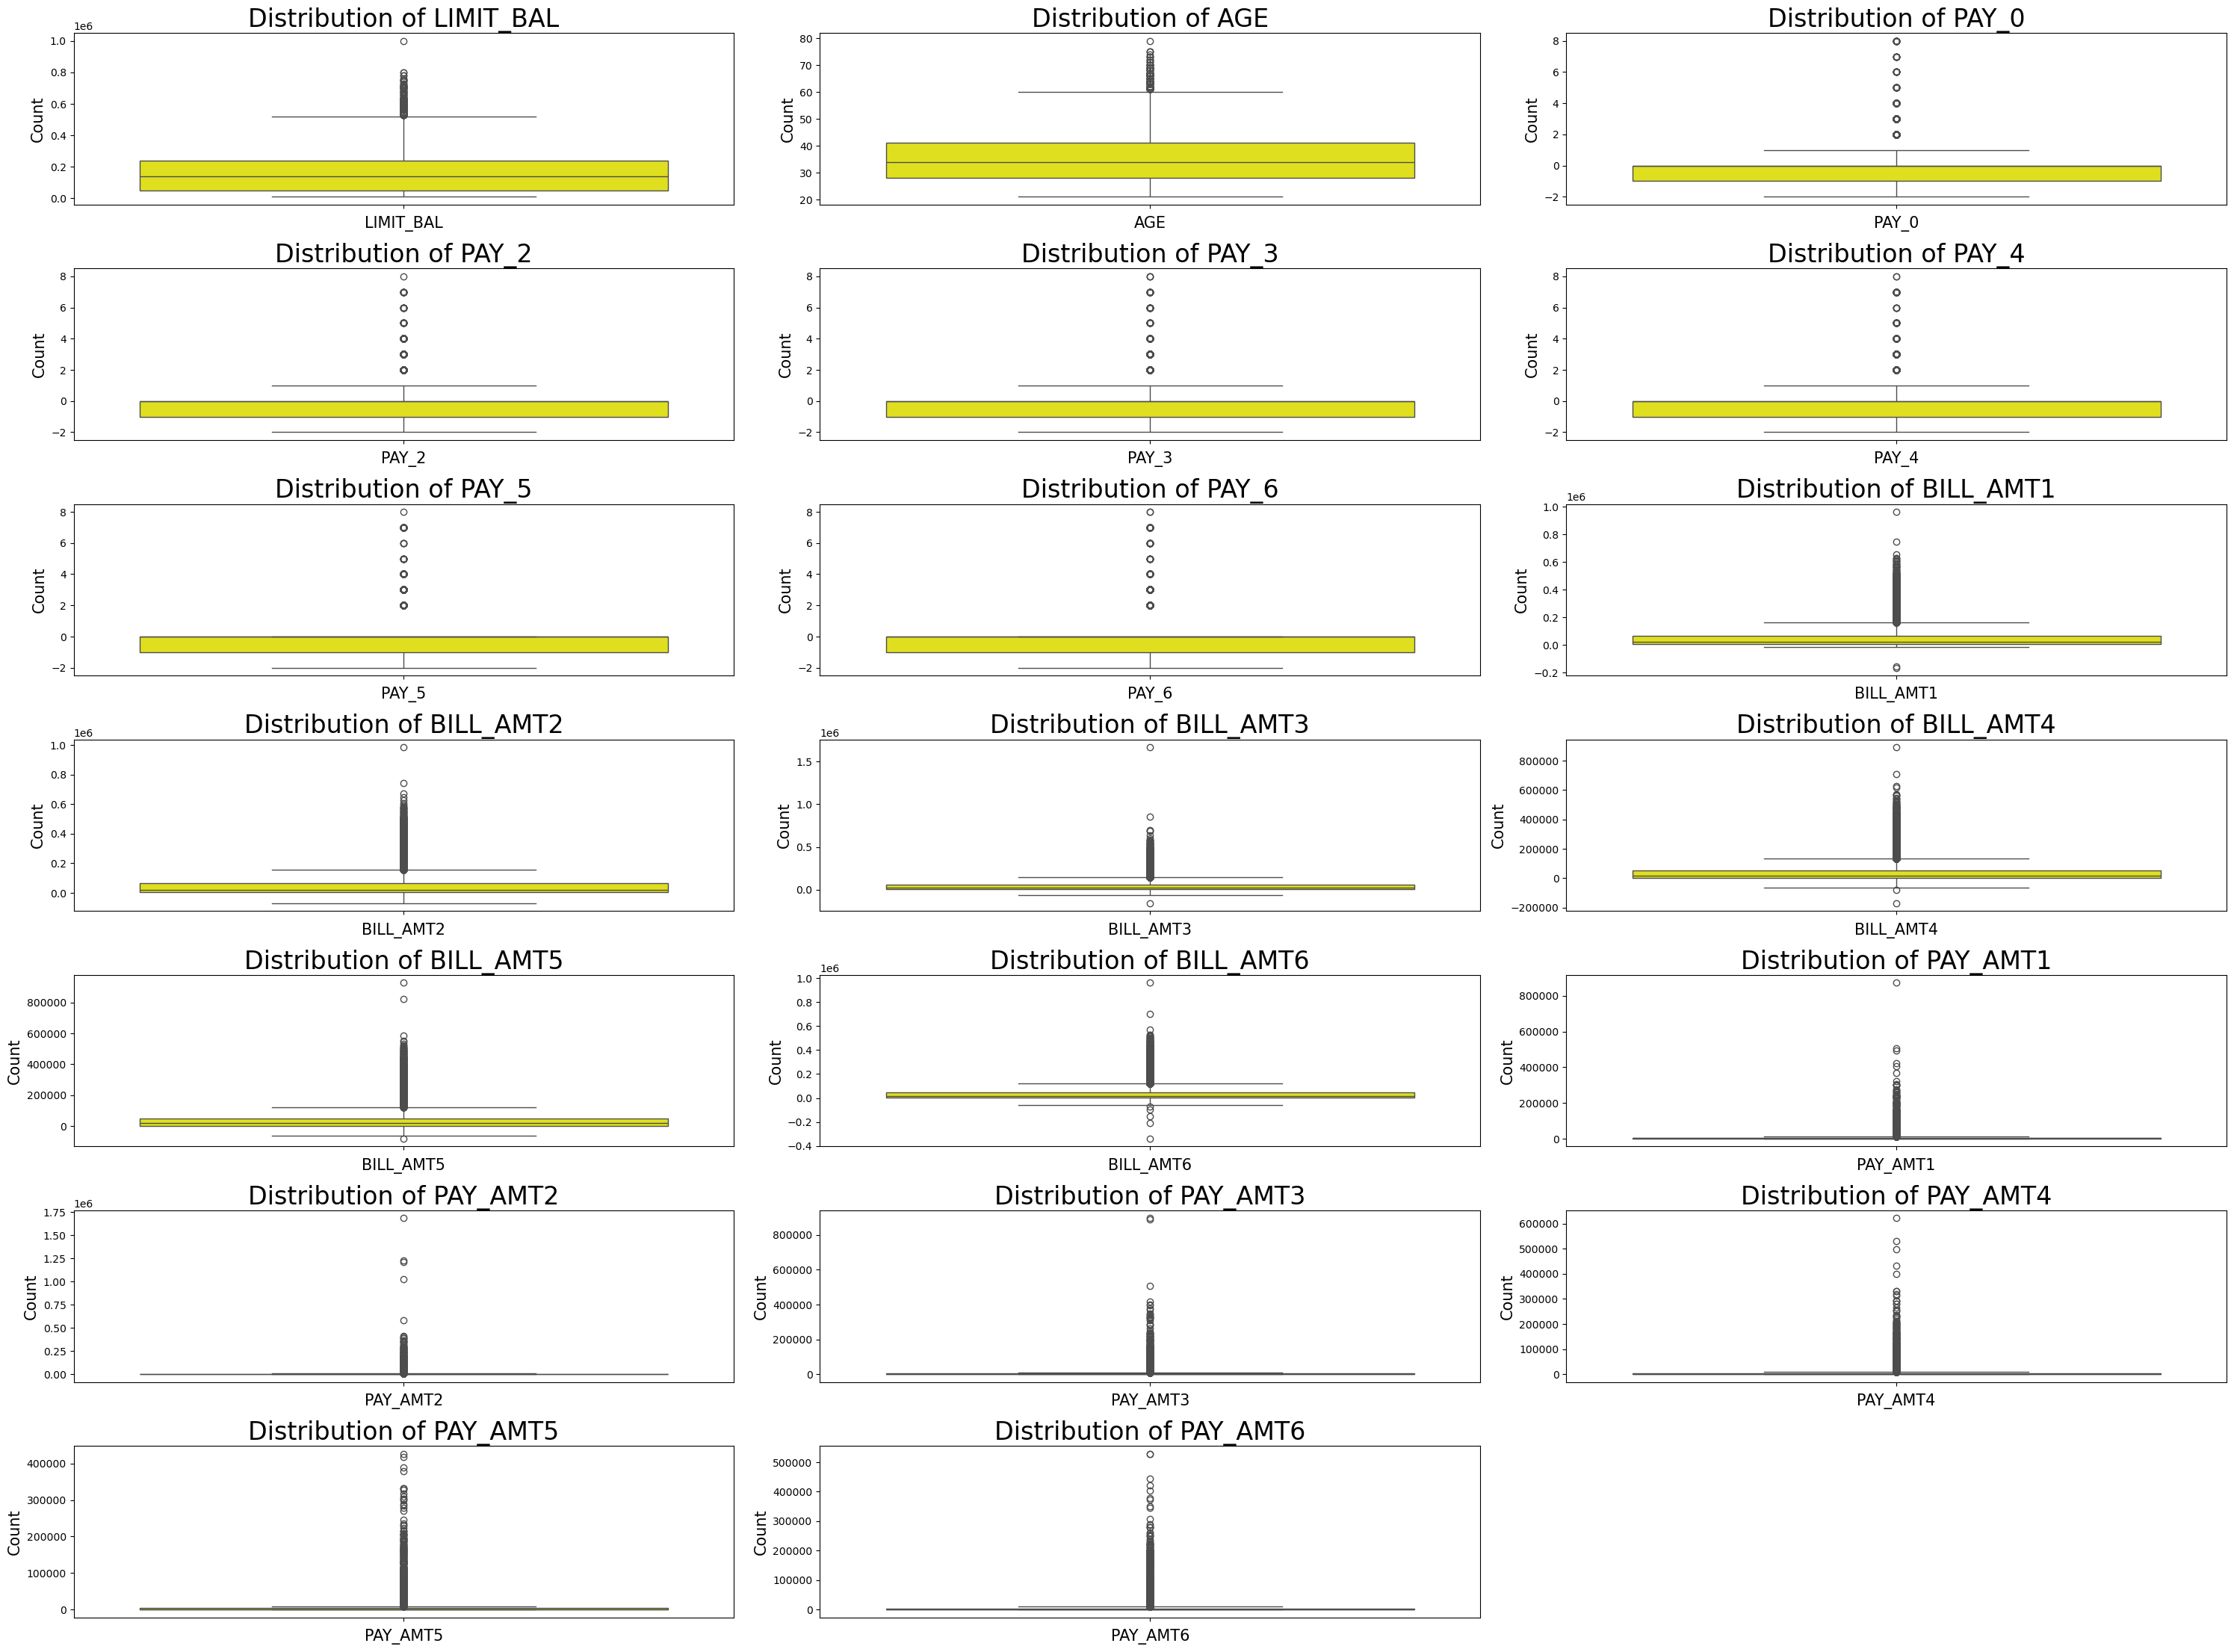

In [44]:
# Boxplot -For outlier detection
num_feature=data.drop(columns=['SEX','MARRIAGE','EDUCATION','default payment next month'])     # Drops the target variable and categorical feature variables and is stored in feature
plt.figure(figsize=(30,25))
for index,col in enumerate(num_feature,1):
    plt.subplot(8,3,index)                                 # create subplot for all the features
    sns.boxplot(y=data[col],color='yellow')                # Displays boxplot of feature variable 
    plt.title(f'Distribution of {col}', fontsize=24)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Count', fontsize=15)
plt.tight_layout()
plt.show()

In [45]:
## Handling outlier using IQR method and clipping the outliers by using function clip()
for col in num_feature:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clipping to lower and upper bound
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

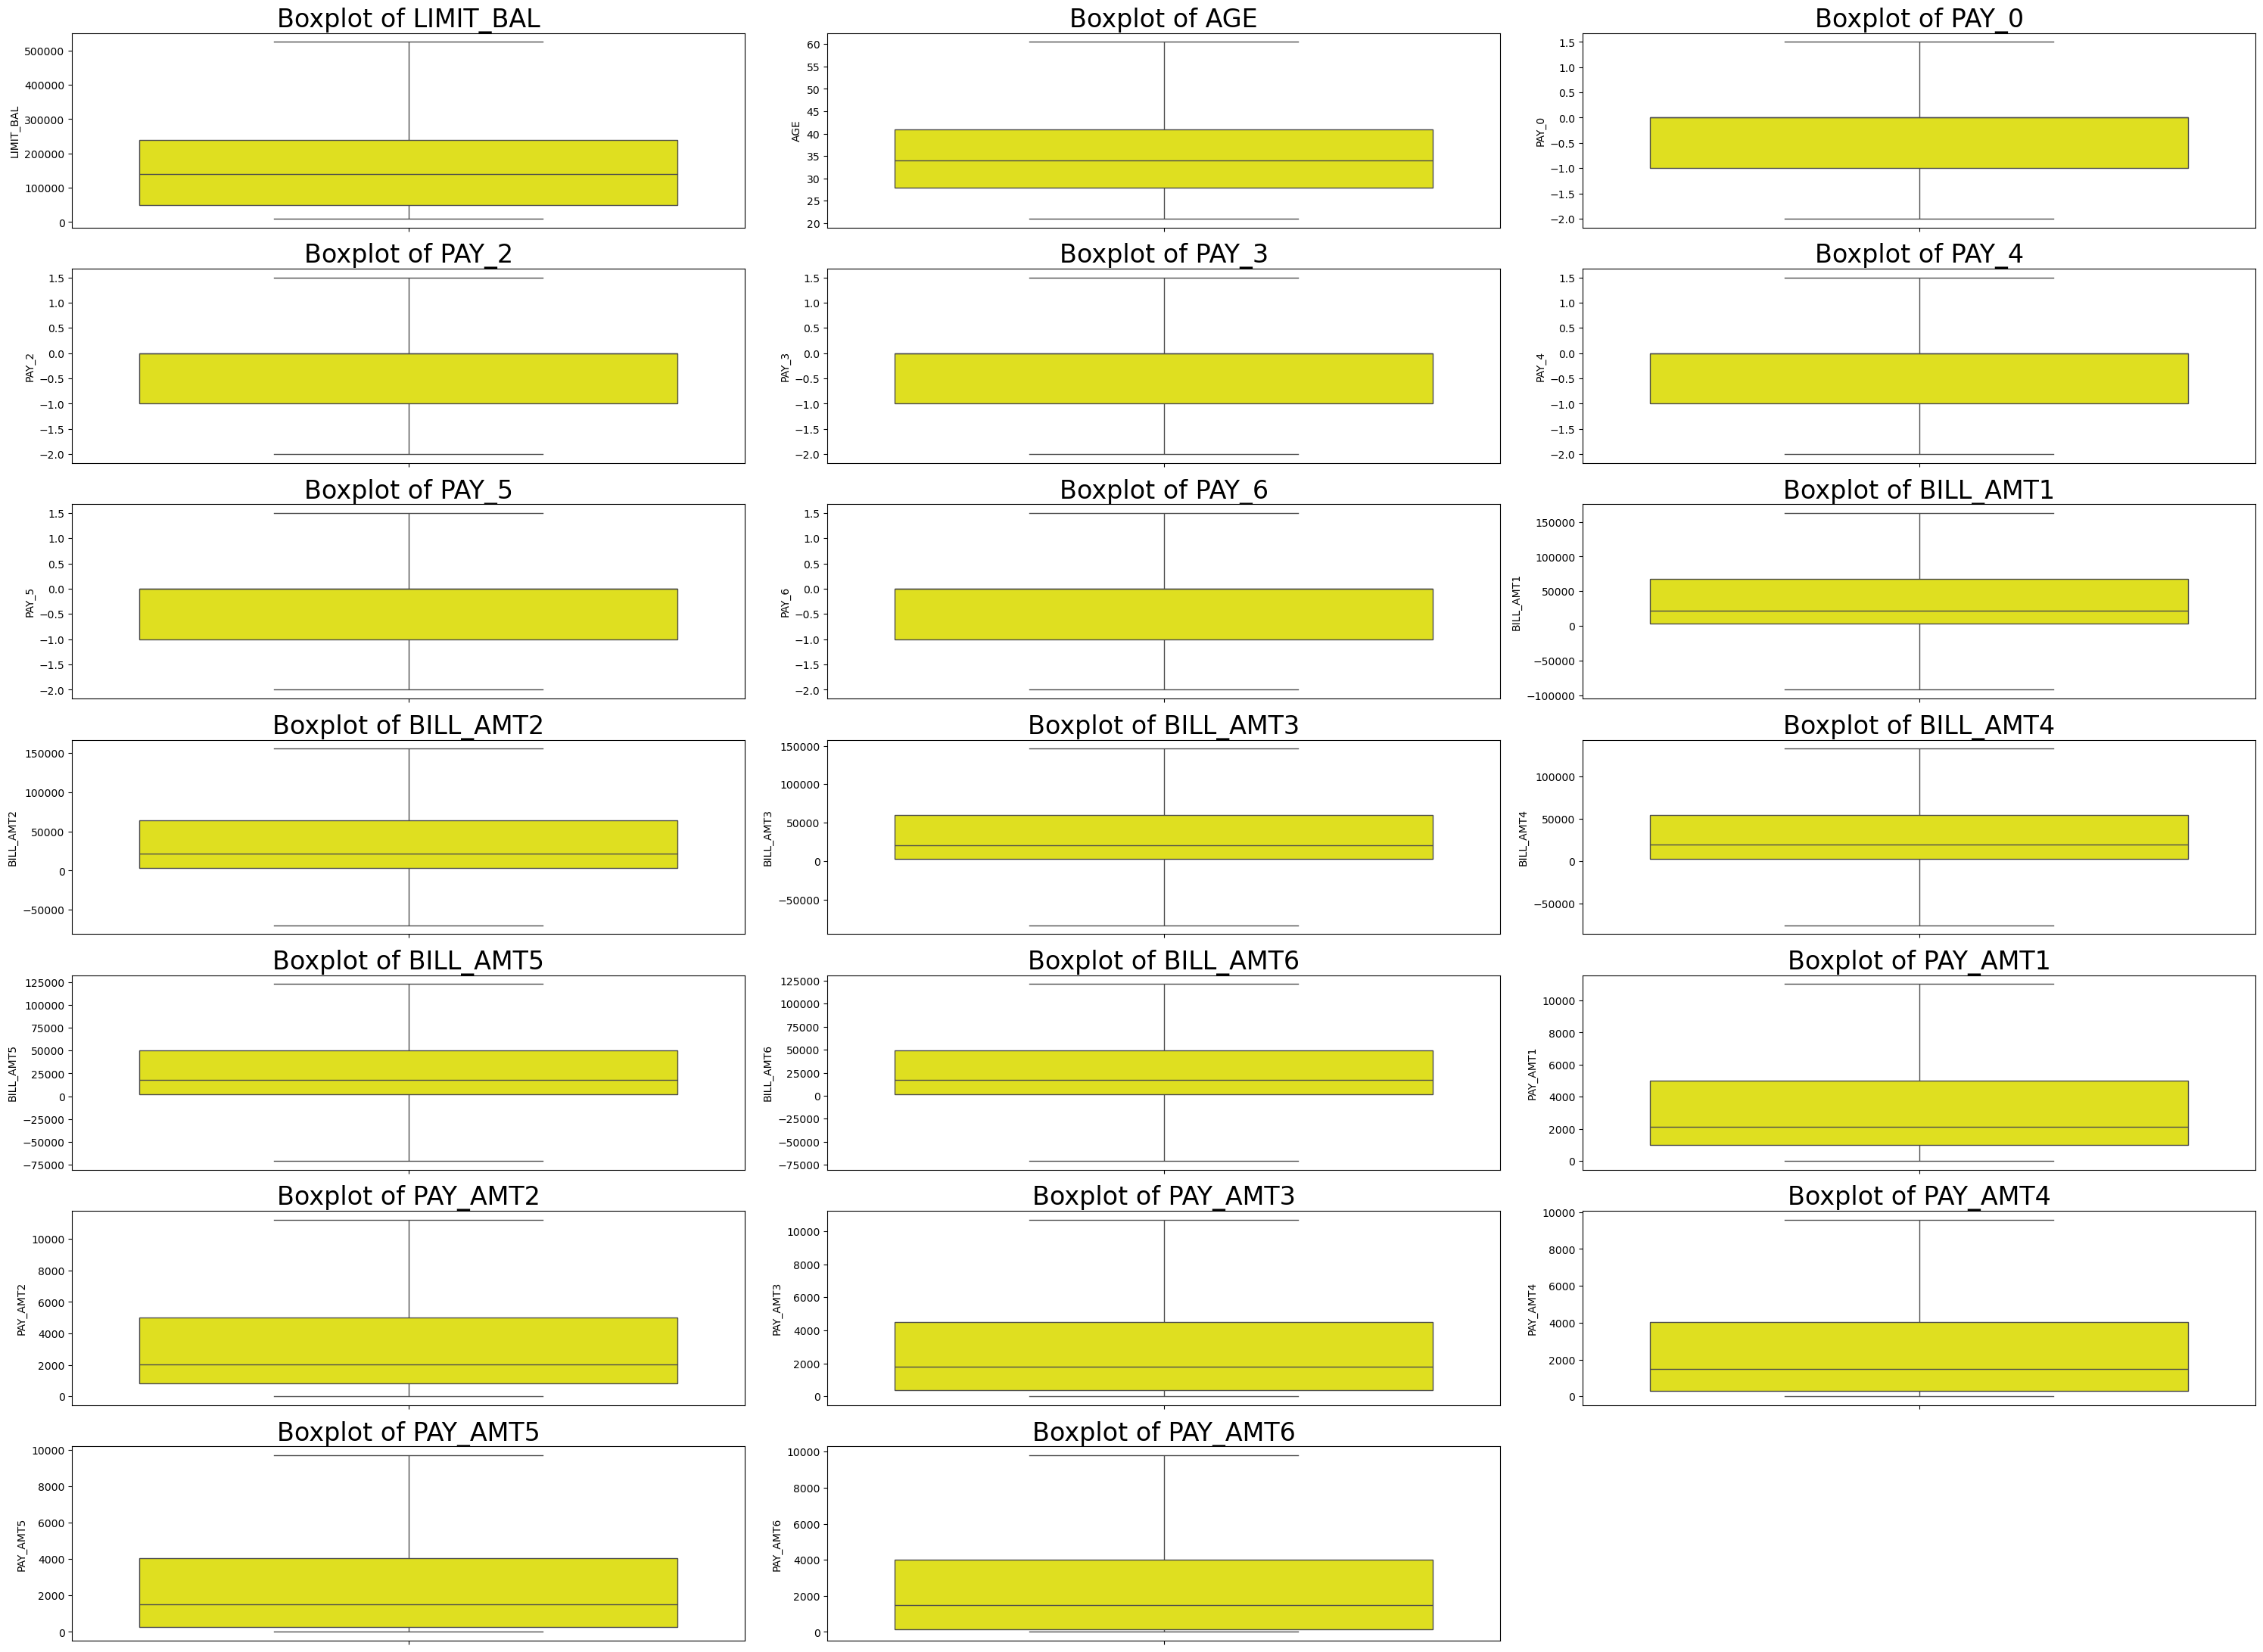

In [46]:
## Boxplot after handling outliers 
plt.figure(figsize=(30,25))
for index,col in enumerate(num_feature,1):
    plt.subplot(8,3,index)
    sns.boxplot(y=data[col],color='yellow')
    plt.title(f'Boxplot of {col}', fontsize=24)
plt.tight_layout()
plt.show()

### Checking for skewness

In [48]:
print("Skewness of variables :\n")
for col in num_feature:
    skew=data[col].skew()
    print("Skewness of " ,col,"is ",round(skew,2))

Skewness of variables :

Skewness of  LIMIT_BAL is  0.91
Skewness of  AGE is  0.65
Skewness of  PAY_0 is  -0.22
Skewness of  PAY_2 is  -0.02
Skewness of  PAY_3 is  -0.02
Skewness of  PAY_4 is  -0.08
Skewness of  PAY_5 is  -0.13
Skewness of  PAY_6 is  -0.08
Skewness of  BILL_AMT1 is  1.2
Skewness of  BILL_AMT2 is  1.19
Skewness of  BILL_AMT3 is  1.18
Skewness of  BILL_AMT4 is  1.18
Skewness of  BILL_AMT5 is  1.18
Skewness of  BILL_AMT6 is  1.2
Skewness of  PAY_AMT1 is  1.03
Skewness of  PAY_AMT2 is  1.11
Skewness of  PAY_AMT3 is  1.2
Skewness of  PAY_AMT4 is  1.18
Skewness of  PAY_AMT5 is  1.18
Skewness of  PAY_AMT6 is  1.21


In [49]:
# Displaying variables with skewness >1
print("Displaying highly skewed variables:")
for col in num_feature:
    skew=data[col].skew()                                          # Finding skewness of each field
    if abs(skew) >1:                                              # Highly skewed values are displayed
        print("Skewness of " ,col,"is",round(skew,2))

Displaying highly skewed variables:
Skewness of  BILL_AMT1 is 1.2
Skewness of  BILL_AMT2 is 1.19
Skewness of  BILL_AMT3 is 1.18
Skewness of  BILL_AMT4 is 1.18
Skewness of  BILL_AMT5 is 1.18
Skewness of  BILL_AMT6 is 1.2
Skewness of  PAY_AMT1 is 1.03
Skewness of  PAY_AMT2 is 1.11
Skewness of  PAY_AMT3 is 1.2
Skewness of  PAY_AMT4 is 1.18
Skewness of  PAY_AMT5 is 1.18
Skewness of  PAY_AMT6 is 1.21


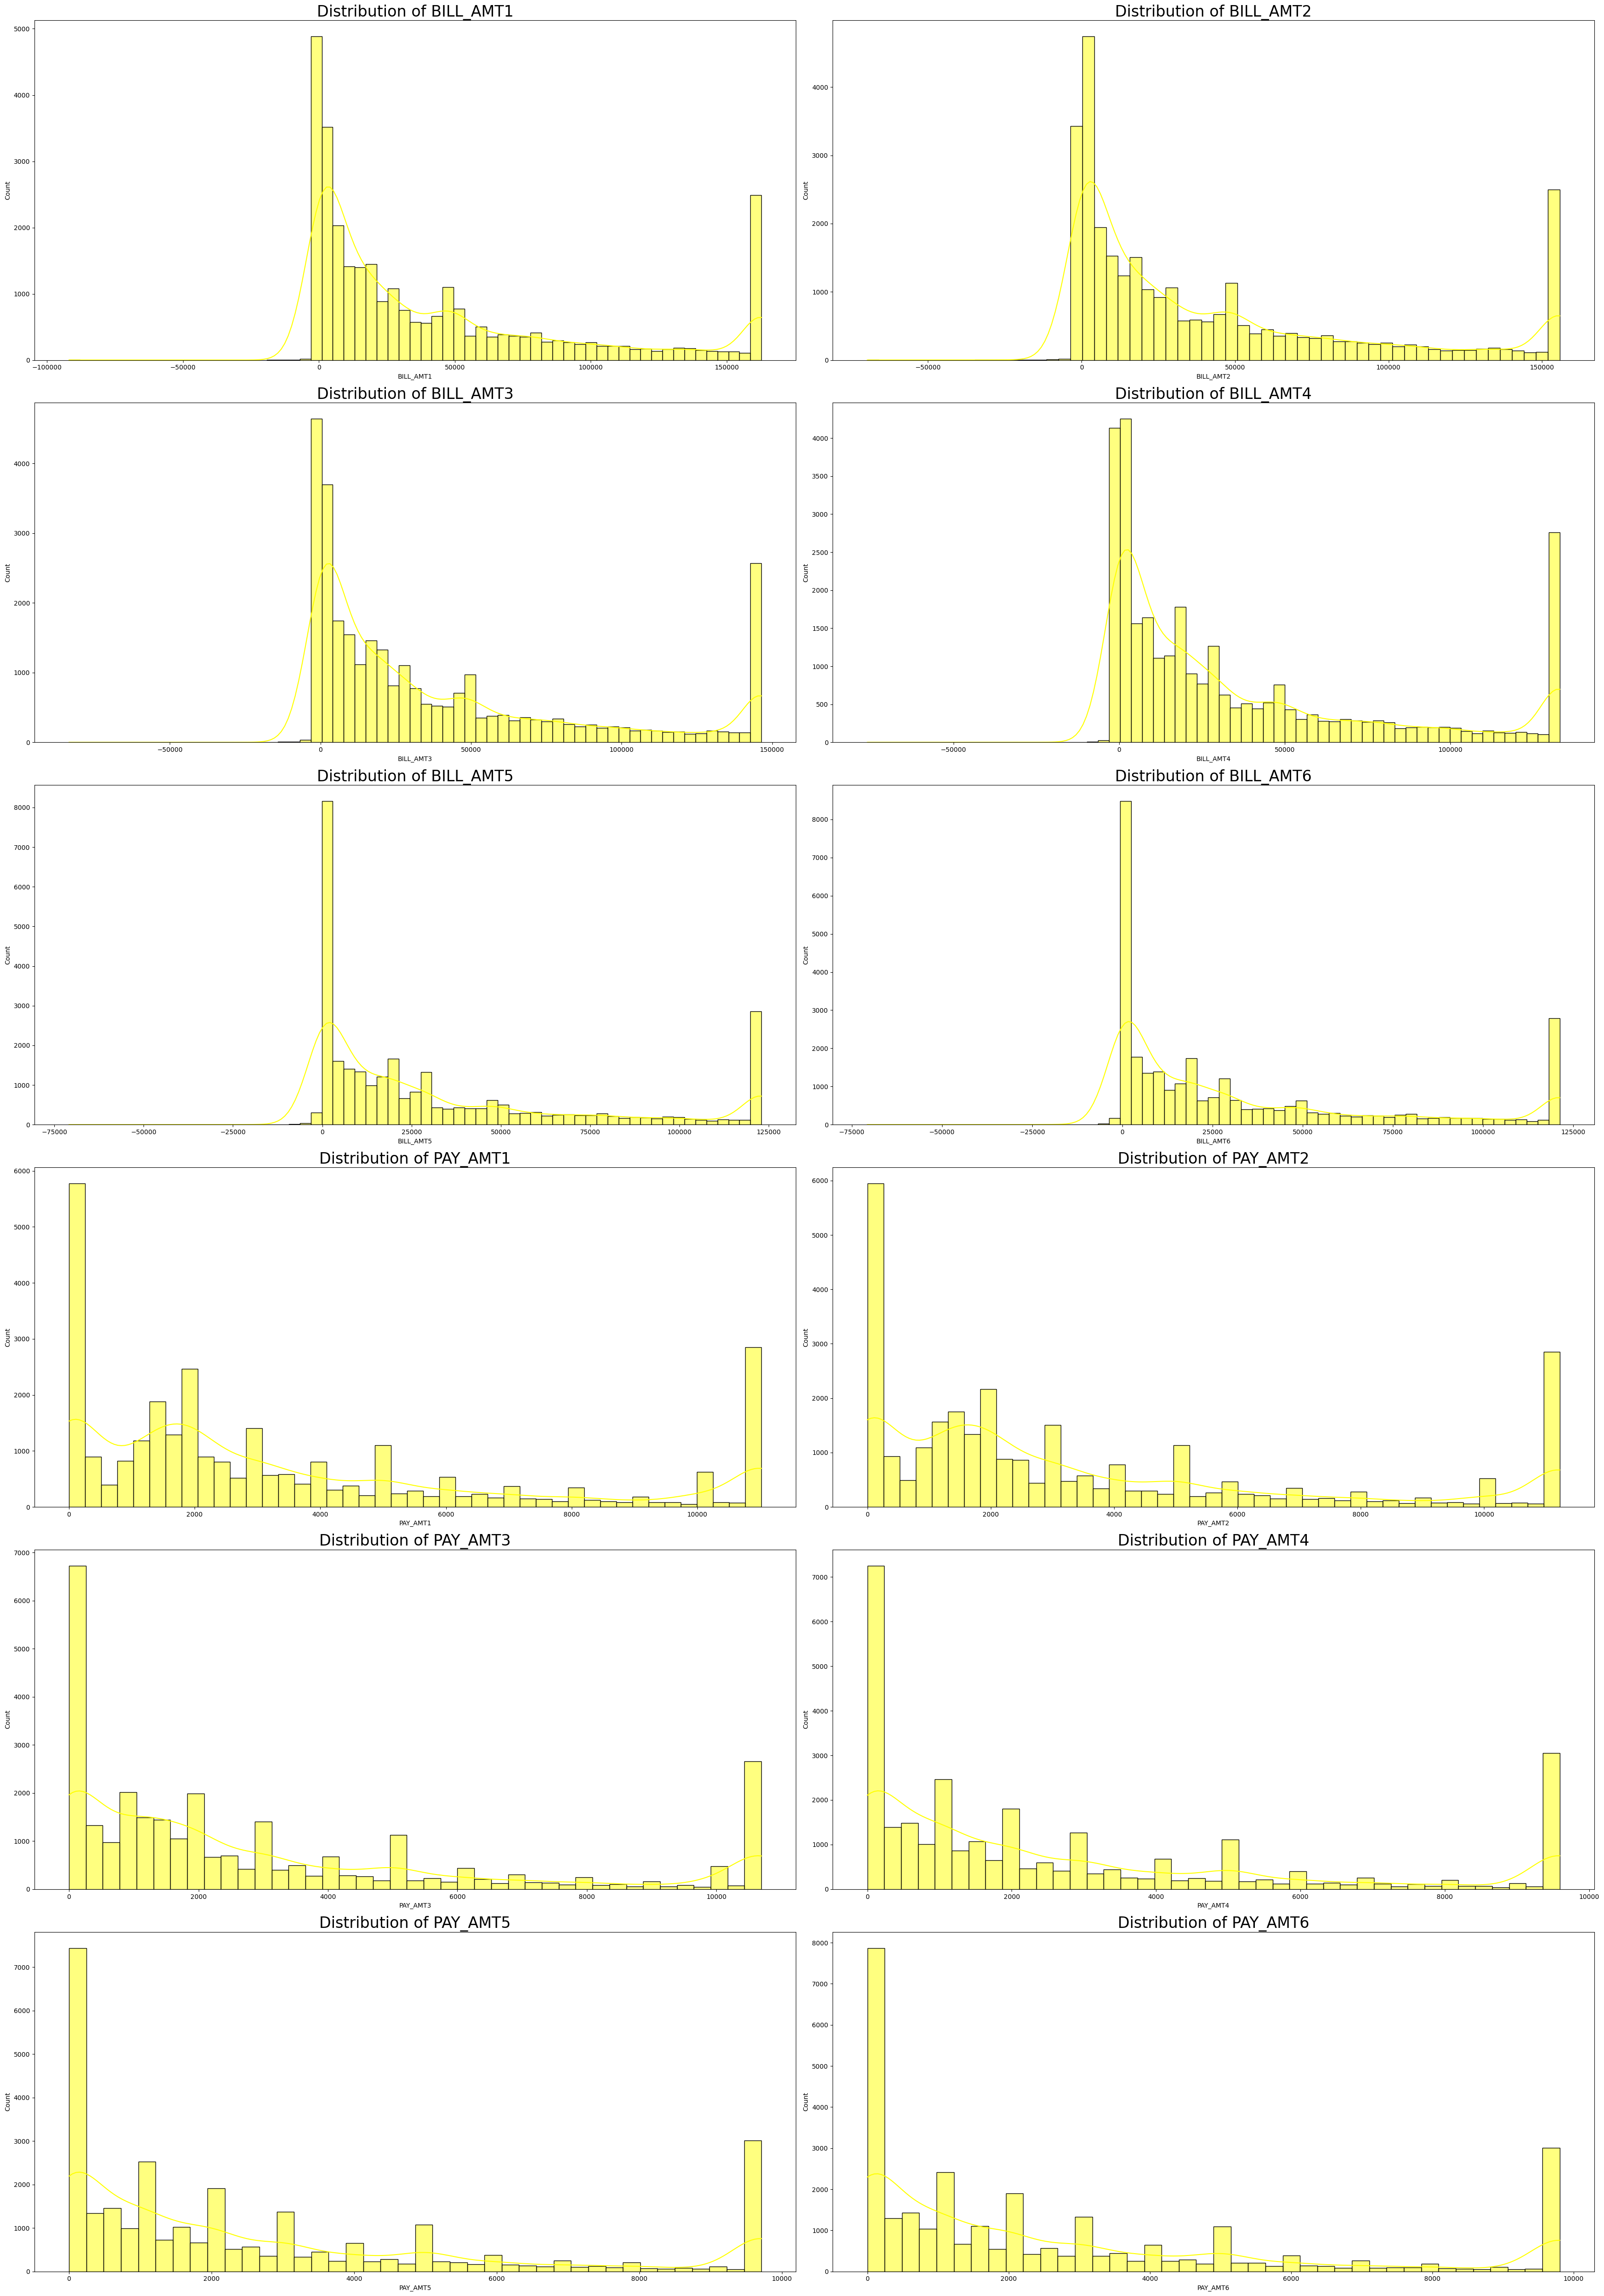

In [50]:
#Histogram visualization of skewness-Before transformation
plt.figure(figsize=(35,50))
index=1
for col in num_feature:
    skew=data[col].skew()                                      
    if abs(skew) >1:
        plt.subplot(6,2,index)
        sns.histplot(data[col],kde=True,color='yellow')
        plt.title(f'Distribution of {col}', fontsize=24)
        index+=1
plt.tight_layout()
plt.show()

In [51]:
## Treating skewness by applying cbrt transformation
for col in num_feature:
    skew=data[col].skew()                                      
    if abs(skew) >1:  
         data[col] = np.cbrt(data[col])                       #Cube root transformation is applied as the numerical features has negative,zero and positive values    

In [52]:
# Recalculating Skewness after treatment
print("Skewness after sqrt transformation:")
for col in num_feature:
    skew=data[col].skew() 
    print("Skewness of " ,col,"is",round(skew,2))

Skewness after sqrt transformation:
Skewness of  LIMIT_BAL is 0.91
Skewness of  AGE is 0.65
Skewness of  PAY_0 is -0.22
Skewness of  PAY_2 is -0.02
Skewness of  PAY_3 is -0.02
Skewness of  PAY_4 is -0.08
Skewness of  PAY_5 is -0.13
Skewness of  PAY_6 is -0.08
Skewness of  BILL_AMT1 is -0.11
Skewness of  BILL_AMT2 is -0.15
Skewness of  BILL_AMT3 is -0.16
Skewness of  BILL_AMT4 is -0.17
Skewness of  BILL_AMT5 is -0.16
Skewness of  BILL_AMT6 is -0.14
Skewness of  PAY_AMT1 is -0.53
Skewness of  PAY_AMT2 is -0.47
Skewness of  PAY_AMT3 is -0.32
Skewness of  PAY_AMT4 is -0.26
Skewness of  PAY_AMT5 is -0.26
Skewness of  PAY_AMT6 is -0.22


### Comment:
Skewness is now with -0.5 to 5 which is acceptable.

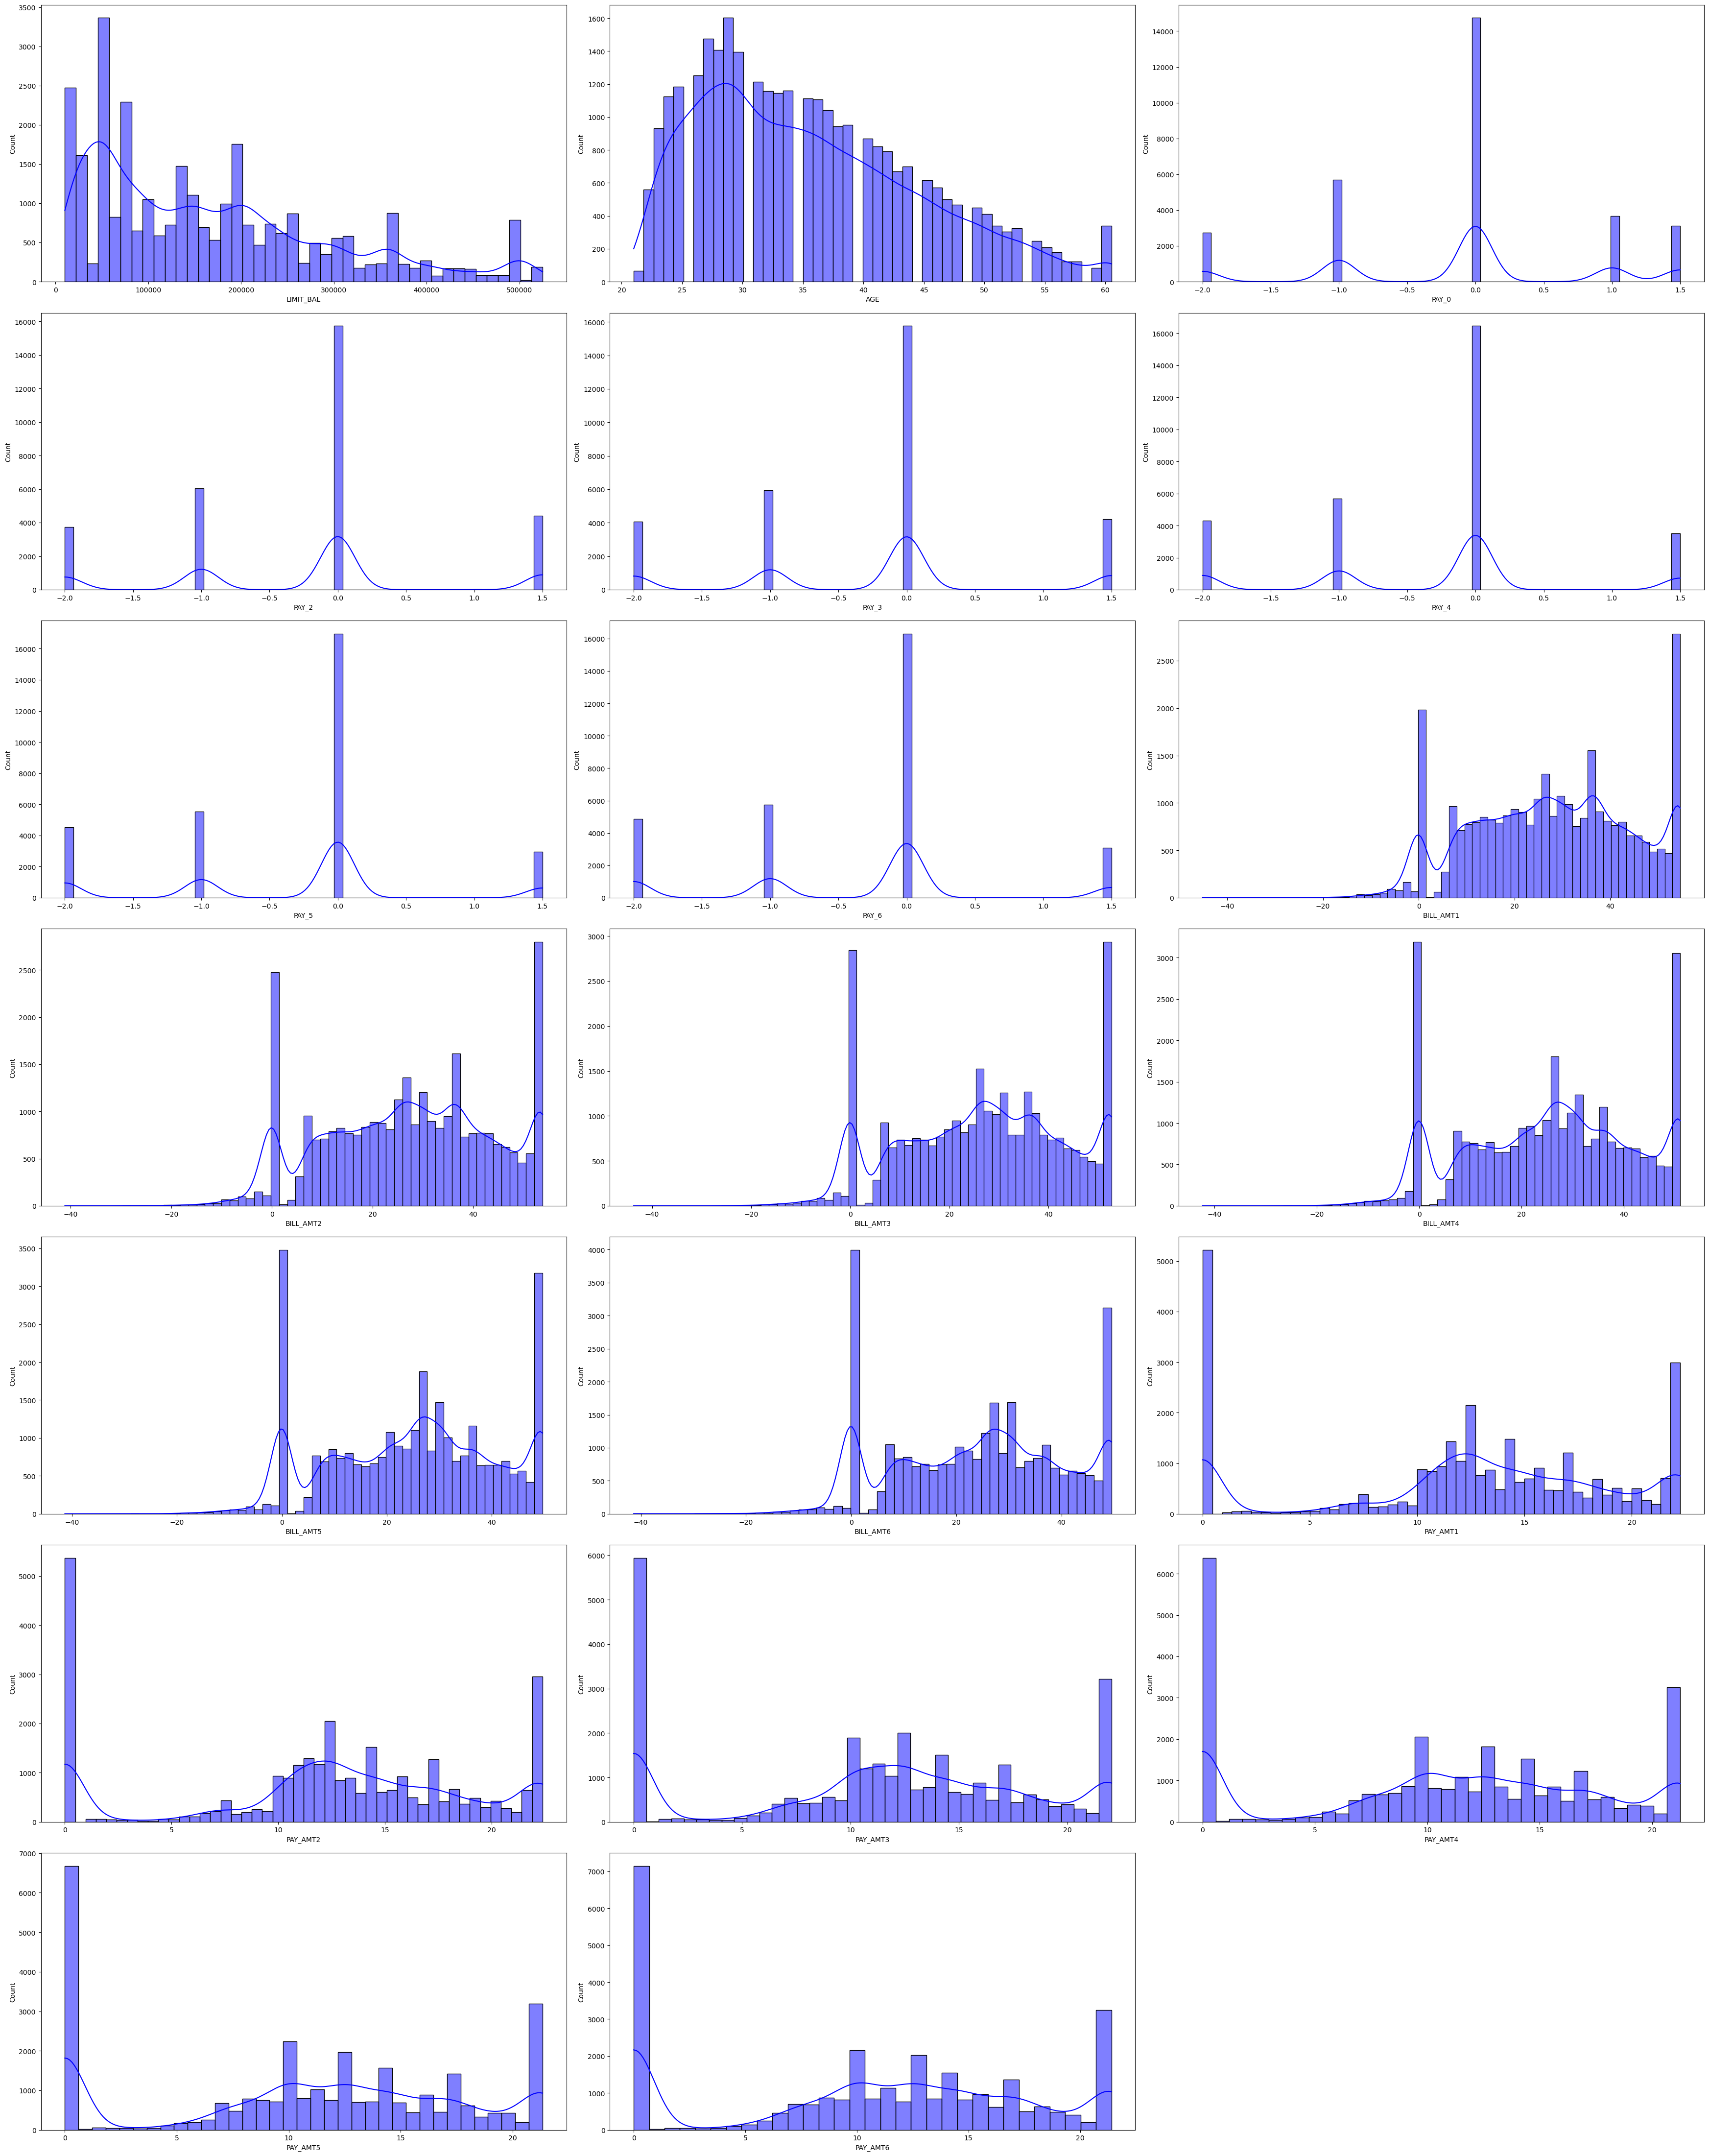

In [54]:
#Histogram visualization of skewness-After transformation
plt.figure(figsize=(35,50))
index=1
for col in num_feature:
    skew=data[col].skew()                                      # Finding skewness of each field
    plt.subplot(8,3,index)
    sns.histplot(data[col],kde=True,color='blue')
    index+=1
plt.tight_layout()
plt.show()

In [55]:
# Rechecking for null values.
print("Null Values after transformation",data.isnull().sum().sum())


Null Values after transformation 0


In [56]:
# Rechecking for duplicate rows.
print("Duplicate rows after transformation",data.duplicated().sum())

Duplicate rows after transformation 26


In [57]:
#Removing duplicate rows
data.drop_duplicates(inplace=True)

In [58]:
# Rechecking for duplicate rows
data.duplicated().sum()

0

In [60]:
# Rechecking for outliers after transformation
feature=data.drop('default payment next month',axis=1)
print("No of outliers :\n")
for col in num_feature:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier=((data[col]<lower_bound) | (data[col]>upper_bound)).sum()
    print(col,":",outlier)

No of outliers :

LIMIT_BAL : 0
AGE : 0
PAY_0 : 0
PAY_2 : 0
PAY_3 : 0
PAY_4 : 0
PAY_5 : 0
PAY_6 : 0
BILL_AMT1 : 4
BILL_AMT2 : 14
BILL_AMT3 : 12
BILL_AMT4 : 15
BILL_AMT5 : 14
BILL_AMT6 : 17
PAY_AMT1 : 0
PAY_AMT2 : 0
PAY_AMT3 : 0
PAY_AMT4 : 0
PAY_AMT5 : 0
PAY_AMT6 : 0


In [62]:
## Handling outlier-Using IQR Method
for col in num_feature:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clipping the column
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)       

    outlier=((data[col]<lower_bound) | (data[col]>upper_bound)).sum()      #Displaying count of outliers after clipping
    print(col,":",outlier)

LIMIT_BAL : 0
AGE : 0
PAY_0 : 0
PAY_2 : 0
PAY_3 : 0
PAY_4 : 0
PAY_5 : 0
PAY_6 : 0
BILL_AMT1 : 0
BILL_AMT2 : 0
BILL_AMT3 : 0
BILL_AMT4 : 0
BILL_AMT5 : 0
BILL_AMT6 : 0
PAY_AMT1 : 0
PAY_AMT2 : 0
PAY_AMT3 : 0
PAY_AMT4 : 0
PAY_AMT5 : 0
PAY_AMT6 : 0


## 4.Feature Engineering

In [64]:
# Renaming target variable 'default payment next month' as 'TARGET'
data.rename(columns={'default payment next month':'TARGET'},inplace=True) 
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
0,20000,2,2,1,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,0.000000,0.000000,0.000000,0.000000,8.832285,0.000000,0.000000,0.000000,0.000000,1
1,120000,2,2,2,26.0,-1.0,1.5,0.0,0.0,0.0,...,14.845828,15.117594,14.829173,0.000000,10.000000,10.000000,10.000000,0.000000,12.599210,1
2,90000,2,2,2,34.0,0.0,0.0,0.0,0.0,0.0,...,24.289887,24.633589,24.959401,11.492749,11.447142,10.000000,10.000000,10.000000,17.099759,0
3,50000,2,2,1,37.0,0.0,0.0,0.0,0.0,0.0,...,30.478979,30.708683,30.915134,12.599210,12.638982,10.626586,10.322801,10.224904,10.000000,0
4,50000,1,2,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,27.562941,26.752191,26.745203,12.599210,22.390414,21.544347,20.800838,8.832285,8.789347,0


In [65]:
#Renaming the columns PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6 as REPAYMENT-SEPT,REPAYMENT-AUG,REPAYMENT-JULY,REPAYMENT-JUNE,REPAYMENT-MAY & REPAYMENT-APRIL
data.rename(columns={'PAY_0':'REPAYMENT-SEPT','PAY_2':'REPAYMENT-AUG','PAY_3':'REPAYMENT-JULY','PAY_4':'REPAYMENT-JUNE','PAY_5':'REPAYMENT-MAY','PAY_6':'REPAYMENT-APRIL'},inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAYMENT-SEPT,REPAYMENT-AUG,REPAYMENT-JULY,REPAYMENT-JUNE,REPAYMENT-MAY,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
0,20000,2,2,1,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,0.000000,0.000000,0.000000,0.000000,8.832285,0.000000,0.000000,0.000000,0.000000,1
1,120000,2,2,2,26.0,-1.0,1.5,0.0,0.0,0.0,...,14.845828,15.117594,14.829173,0.000000,10.000000,10.000000,10.000000,0.000000,12.599210,1
2,90000,2,2,2,34.0,0.0,0.0,0.0,0.0,0.0,...,24.289887,24.633589,24.959401,11.492749,11.447142,10.000000,10.000000,10.000000,17.099759,0
3,50000,2,2,1,37.0,0.0,0.0,0.0,0.0,0.0,...,30.478979,30.708683,30.915134,12.599210,12.638982,10.626586,10.322801,10.224904,10.000000,0
4,50000,1,2,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,27.562941,26.752191,26.745203,12.599210,22.390414,21.544347,20.800838,8.832285,8.789347,0


In [66]:
#Renaming the columns BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6 as BILL_AMT-SEPT,BILL_AMT-AUG,BILL_AMT-JULY,BILL_AMT-JUNE,BILL_AMT-MAY& BILL_AMT-APRIL
data.rename(columns={'BILL_AMT1':'BILL_AMT-SEPT','BILL_AMT2':'BILL_AMT-AUG','BILL_AMT3':'BILL_AMT-JULY','BILL_AMT4':'BILL_AMT-JUNE','BILL_AMT5':'BILL_AMT-MAY','BILL_AMT6':'BILL_AMT-APRIL'},inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAYMENT-SEPT,REPAYMENT-AUG,REPAYMENT-JULY,REPAYMENT-JUNE,REPAYMENT-MAY,...,BILL_AMT-JUNE,BILL_AMT-MAY,BILL_AMT-APRIL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
0,20000,2,2,1,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,0.000000,0.000000,0.000000,0.000000,8.832285,0.000000,0.000000,0.000000,0.000000,1
1,120000,2,2,2,26.0,-1.0,1.5,0.0,0.0,0.0,...,14.845828,15.117594,14.829173,0.000000,10.000000,10.000000,10.000000,0.000000,12.599210,1
2,90000,2,2,2,34.0,0.0,0.0,0.0,0.0,0.0,...,24.289887,24.633589,24.959401,11.492749,11.447142,10.000000,10.000000,10.000000,17.099759,0
3,50000,2,2,1,37.0,0.0,0.0,0.0,0.0,0.0,...,30.478979,30.708683,30.915134,12.599210,12.638982,10.626586,10.322801,10.224904,10.000000,0
4,50000,1,2,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,27.562941,26.752191,26.745203,12.599210,22.390414,21.544347,20.800838,8.832285,8.789347,0


In [67]:
#Renaming the columns PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6 as AMT_PAID-SEPT,AMT_PAID-AUG,AMT_PAID-JULY,AMT_PAID-JUNE,AMT_PAID-MAY& AMT_PAID-APRIL
data.rename(columns={'PAY_AMT1':'AMT_PAID-SEPT','PAY_AMT2':'AMT_PAID-AUG','PAY_AMT3':'AMT_PAID-JULY','PAY_AMT4':'AMT_PAID-JUNE','PAY_AMT5':'AMT_PAID-MAY','PAY_AMT6':'AMT_PAID-APRIL'},inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAYMENT-SEPT,REPAYMENT-AUG,REPAYMENT-JULY,REPAYMENT-JUNE,REPAYMENT-MAY,...,BILL_AMT-JUNE,BILL_AMT-MAY,BILL_AMT-APRIL,AMT_PAID-SEPT,AMT_PAID-AUG,AMT_PAID-JULY,AMT_PAID-JUNE,AMT_PAID-MAY,AMT_PAID-APRIL,TARGET
0,20000,2,2,1,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,0.000000,0.000000,0.000000,0.000000,8.832285,0.000000,0.000000,0.000000,0.000000,1
1,120000,2,2,2,26.0,-1.0,1.5,0.0,0.0,0.0,...,14.845828,15.117594,14.829173,0.000000,10.000000,10.000000,10.000000,0.000000,12.599210,1
2,90000,2,2,2,34.0,0.0,0.0,0.0,0.0,0.0,...,24.289887,24.633589,24.959401,11.492749,11.447142,10.000000,10.000000,10.000000,17.099759,0
3,50000,2,2,1,37.0,0.0,0.0,0.0,0.0,0.0,...,30.478979,30.708683,30.915134,12.599210,12.638982,10.626586,10.322801,10.224904,10.000000,0
4,50000,1,2,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,27.562941,26.752191,26.745203,12.599210,22.390414,21.544347,20.800838,8.832285,8.789347,0


In [68]:
data['SEX'].value_counts()                    # Displays the count in each category(1=Male,2=Female)

SEX
2    18081
1    11858
Name: count, dtype: int64

In [69]:
data['SEX']=data['SEX'].map({2:1,1:0})        # Mapping SEX column from values Male =1 & Female=2 to Male=0 & Female=1 for binary classification
data['SEX'].value_counts()

SEX
1    18081
0    11858
Name: count, dtype: int64

In [70]:
data['EDUCATION'].value_counts()              #Displaying values in the field education

EDUCATION
2    14010
1    10550
3     4911
5      280
4      123
6       51
0       14
Name: count, dtype: int64

### Comment :
According to dataset documentation, Education has the following values :
1 = graduate school; 2 = university; 3 = high school; 4 = others.

But our dataset has values 0,5 and 6 which is not defined and hence same has to be replaced or removed.

As it totals only to 345 rows, which is only 1.1% of total rows we may remove the same.

In [72]:
data = data[data['EDUCATION'].isin([1, 2, 3, 4])]              # Filtering the column EDUCATION by keeping valid values

In [73]:
data['EDUCATION'].unique()                                    # Not defined values are removed

array([2, 1, 3, 4], dtype=int64)

In [77]:
data['MARRIAGE'].value_counts()       

MARRIAGE
2    15778
1    13444
3      318
0       54
Name: count, dtype: int64

### Comment :
According to dataset documentation, Marital Status has the following values : 1 = married; 2 = single; 3 = others.

But our dataset has values 0 which is not defined and hence same has to be replaced or removed.

As we have only 54rows with undefined value 0 we may remove the same.

In [79]:
data=data[data['MARRIAGE'].isin([1,2,3])]                  # Filtering the column MARRIAGE by keeping valid values

In [80]:
data['MARRIAGE'].unique()                                    # Not defined values are removed

array([1, 2, 3], dtype=int64)

## 5.Encoding categorical data

In [82]:
# Performing OneHotEncoding for categorical fields 'MARRIAGE' and 'EDUCATION'
data=pd.get_dummies(data,columns=['MARRIAGE','EDUCATION'],drop_first=True)

In [83]:
data.head()

,LIMIT_BAL,SEX,AGE,REPAYMENT-SEPT,REPAYMENT-AUG,REPAYMENT-JULY,REPAYMENT-JUNE,REPAYMENT-MAY,REPAYMENT-APRIL,BILL_AMT-SEPT,...,AMT_PAID-JULY,AMT_PAID-JUNE,AMT_PAID-MAY,AMT_PAID-APRIL,TARGET,MARRIAGE_2,MARRIAGE_3,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,20000,1,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,15.758079,...,0.000000,0.000000,0.000000,0.000000,1,False,False,True,False,False
1,120000,1,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,13.893754,...,10.000000,10.000000,0.000000,12.599210,1,True,False,True,False,False
2,90000,1,34.0,0.0,0.0,0.0,0.0,0.0,0.0,30.807338,...,10.000000,10.000000,10.000000,17.099759,0,True,False,True,False,False
3,50000,1,37.0,0.0,0.0,0.0,0.0,0.0,0.0,36.085701,...,10.626586,10.322801,10.224904,10.000000,0,False,False,True,False,False
4,50000,0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,20.501487,...,21.544347,20.800838,8.832285,8.789347,0,False,False,True,False,False


### Comment:
Even though the fields 'MARRIAGE' and 'EDUCATION' are of datatype integer both the fields are categorical variables.

For the model to understand the said values are categorical and not numeric we are performing OneHotEncoding.

## 6.Feature Selection

In [86]:
correlation_metrics=data.corr()
correlation_metrics

,LIMIT_BAL,SEX,AGE,REPAYMENT-SEPT,REPAYMENT-AUG,REPAYMENT-JULY,REPAYMENT-JUNE,REPAYMENT-MAY,REPAYMENT-APRIL,BILL_AMT-SEPT,...,AMT_PAID-JULY,AMT_PAID-JUNE,AMT_PAID-MAY,AMT_PAID-APRIL,TARGET,MARRIAGE_2,MARRIAGE_3,EDUCATION_2,EDUCATION_3,EDUCATION_4
LIMIT_BAL,1.000000,0.025906,0.144105,-0.283877,-0.310645,-0.298539,-0.277322,-0.255996,-0.240093,0.034820,...,0.230588,0.232286,0.243262,0.273511,-0.155674,-0.091250,-0.056549,-0.150315,-0.140534,0.026493
SEX,0.025906,1.000000,-0.091489,-0.055819,-0.071154,-0.067125,-0.059386,-0.053044,-0.041927,-0.042118,...,0.014144,0.008461,0.010444,0.030339,-0.039023,-0.030271,-0.002600,0.026774,-0.008147,0.007290
AGE,0.144105,-0.091489,1.000000,-0.048735,-0.060404,-0.061747,-0.059271,-0.063349,-0.056934,-0.002704,...,0.010897,0.022687,0.020335,0.021168,0.013540,-0.471387,0.084453,-0.075687,0.234253,-0.011179
REPAYMENT-SEPT,-0.283877,-0.055819,-0.048735,1.000000,0.645578,0.560562,0.529289,0.504401,0.477884,0.300735,...,-0.042476,-0.023867,-0.014409,-0.033560,0.292147,0.016090,0.020088,0.103008,0.060280,-0.028727
REPAYMENT-AUG,-0.310645,-0.071154,-0.060404,0.645578,1.000000,0.785552,0.692634,0.656016,0.613387,0.530054,...,0.092539,0.093736,0.098406,0.080659,0.234702,0.026485,0.013766,0.131109,0.065612,-0.035638
REPAYMENT-JULY,-0.298539,-0.067125,-0.061747,0.560562,0.785552,1.000000,0.790550,0.703094,0.652038,0.476936,...,0.110385,0.122160,0.126683,0.099284,0.207525,0.031955,0.017869,0.124632,0.064151,-0.033204
REPAYMENT-JUNE,-0.277322,-0.059386,-0.059271,0.529289,0.692634,0.790550,1.000000,0.819535,0.718589,0.468531,...,0.076833,0.152788,0.169830,0.148766,0.185509,0.033282,0.018602,0.120630,0.058396,-0.034366
REPAYMENT-MAY,-0.255996,-0.053044,-0.063349,0.504401,0.656016,0.703094,0.819535,1.000000,0.818206,0.460098,...,0.279940,0.120795,0.198196,0.183458,0.171831,0.038744,0.013419,0.111832,0.049081,-0.030519
REPAYMENT-APRIL,-0.240093,-0.041927,-0.056934,0.477884,0.613387,0.652038,0.718589,0.818206,1.000000,0.448408,...,0.247794,0.302918,0.149871,0.208963,0.155460,0.035349,0.017962,0.105593,0.040139,-0.026103
BILL_AMT-SEPT,0.034820,-0.042118,-0.002704,0.300735,0.530054,0.476936,0.468531,0.460098,0.448408,1.000000,...,0.430944,0.434412,0.414055,0.401017,-0.025367,0.002755,-0.000501,0.094191,0.015510,-0.008443


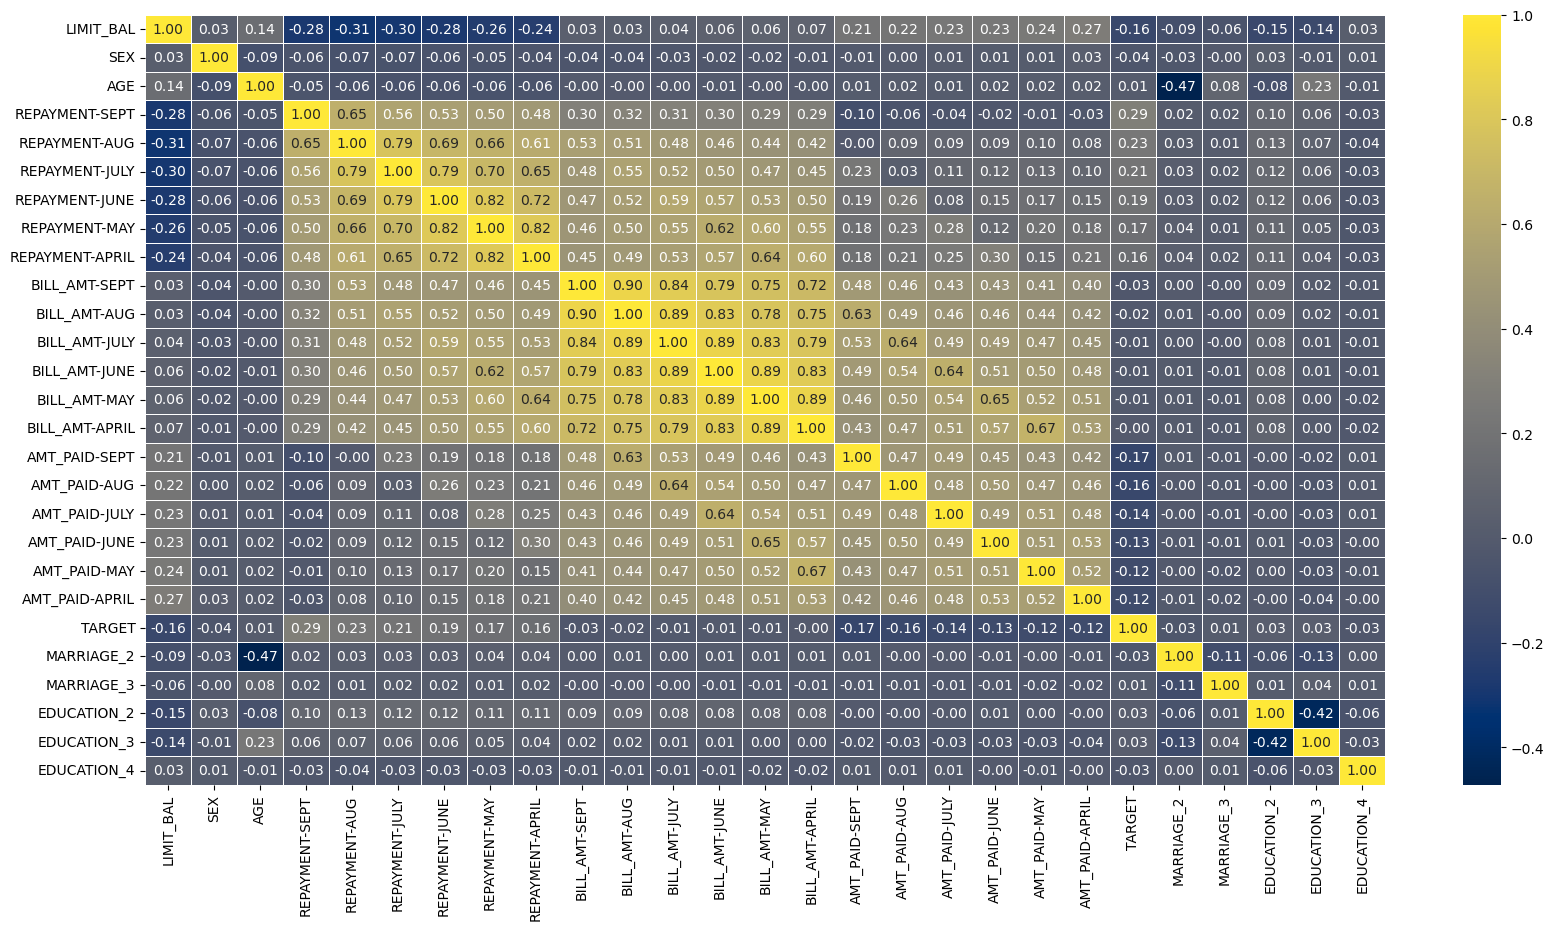

In [89]:
#Heatmap representing the correlation between numerical values
plt.figure(figsize=(20,10))
sns.heatmap(correlation_metrics,annot=True,fmt='0.2f',cmap='cividis',linewidth=0.5)
plt.show()

In [91]:
# Relation of variable with target in ascending order
relation_target=data.corr()[['TARGET']].abs().sort_values(by='TARGET',ascending=False)
relation_target

,TARGET
TARGET,1.000000
REPAYMENT-SEPT,0.292147
REPAYMENT-AUG,0.234702
REPAYMENT-JULY,0.207525
REPAYMENT-JUNE,0.185509
REPAYMENT-MAY,0.171831
AMT_PAID-SEPT,0.171429
AMT_PAID-AUG,0.155771
LIMIT_BAL,0.155674
REPAYMENT-APRIL,0.155460


In [92]:
# Filtering variable that has correlation value less than 0.1
low_relation=relation_target[relation_target['TARGET']<0.01].index.tolist()
low_relation

['BILL_AMT-JUNE', 'BILL_AMT-MAY', 'BILL_AMT-APRIL']

In [93]:
# Dropping low relation columns
data.drop(columns=low_relation,inplace=True)

In [94]:
# Removing highly related variables
h_relation=data.corr(numeric_only=True).abs()
drop_col=0
for i in range(len(h_relation.columns)):
    for j in range(i):
        if h_relation.iloc[i,j]>0.90:
            colname_i=h_relation.columns[i]
            colname_j=h_relation.columns[j]
            print(f"{colname_i} is highly correlated with {colname_j}: {h_relation.iloc[i, j]:.2f}")
            drop_col+=1
if drop_col==0:
    print("No variables have correlation value more than 0.90")

No variables have correlation value more than 0.90


### Comment:
Dropped columns that has correlation value less than 0.1

## 7.Splitting into X and Y

In [97]:
X=data.drop(columns='TARGET')                         # All the features except target is assigned

y=data['TARGET']                                     # Target is assigned to y

## 8.Splitting data into train and test data

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y) # to keep proportion of data in test and train the same stratify is used

## 9.Checking for any imbalance 

In [101]:
y.value_counts()

TARGET
0    22956
1     6584
Name: count, dtype: int64

### Comment:
Default payment (Yes = 1, No = 0), in the above case 'NO' is the majority class. As imbalanced data is tend to be biased towards majority class and hence same has to resampled. 
Using SMOTE technique (Synthetic Minority Oversampling Technique)  we can increases the minority class (Yes) by generating synthetic samples.

In [103]:
# Resampling training dataset 
from imblearn.over_sampling import SMOTE                        #imblearn-library for imbalance datat
sm=SMOTE(random_state=42)
X_train_resample,y_train_resample=sm.fit_resample(X_train,y_train)          # Resampling training data

In [104]:
y_train_resample.value_counts()

TARGET
0    17217
1    17217
Name: count, dtype: int64

## 10.Feature Scaling

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
ss=StandardScaler()                                                # Creating object
X_train_scaled_resampled=ss.fit_transform(X_train_resample)                 # Scaling train data and test data
X_test_scaled=ss.transform(X_test)

## 11.Model Selection and evaluating the performance of each model algorithm

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix,classification_report


models = {'Logistic Regression':LogisticRegression(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier':SVC()}

for name, model in models.items():
    model.fit(X_train_scaled_resampled,y_train_resample)               # training the model
    y_pred=model.predict(X_test_scaled)                      # Predicting the value
    
    print(f"Classification Report for {name}")               # Displays classification report
    print(classification_report(y_test,y_pred))
    

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      5739
           1       0.37      0.57      0.45      1646

    accuracy                           0.69      7385
   macro avg       0.61      0.65      0.62      7385
weighted avg       0.75      0.69      0.71      7385

Classification Report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      5739
           1       0.37      0.45      0.41      1646

    accuracy                           0.71      7385
   macro avg       0.60      0.62      0.61      7385
weighted avg       0.73      0.71      0.72      7385

Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5739
           1       0.57      0.43      0.49      1646

    accuracy                      

### Comment :
Comparison based on score:

Class 1:

1.Accuracy : In terms of accuracy is about 80% in case of Random Forest Classifier means it correctly classifies majority of cases however for other models it is somewhat near to 70%.

2.Precision Score:Out of all prediction ,chance of getting false positive is less for Random Forest which 43% compared to other models.
   
3.Recall Score:Out of all actual defaulter, logisitic regression model identified 57% of them as correct compared to other models. 

4.F1 Score : Random Forest has slightly higher F1 score compared to other algoirthms. 

From the above model evaluation results it is understood that Random Forest Classifer has better evalution score in terms of accuracy,precision score and F1 score.As our aim is to predict customer default the value of recall score matters.Logisitic regression model and SVM were able to identify most of the defaulters. Eventhough most of defaulters were identified it also matters that non defaulter should not be classified as defaulters which is important for business decision. Hence we may choose Random Forest Classification model for prediction as the model shows a balanced performance across all metrics.We may perform hypertuning on the model Random Forest Classification for enhancing its performance.

Confusion Matrix of Logistic Regression
[[4158 1581]
 [ 702  944]]
Confusion Matrix of Decision Tree Classifier
[[4481 1258]
 [ 899  747]]
Confusion Matrix of Random Forest Classifier
[[5202  537]
 [ 933  713]]
Confusion Matrix of Support Vector Classifier
[[4665 1074]
 [ 714  932]]


Confusion Matrix Visualisation


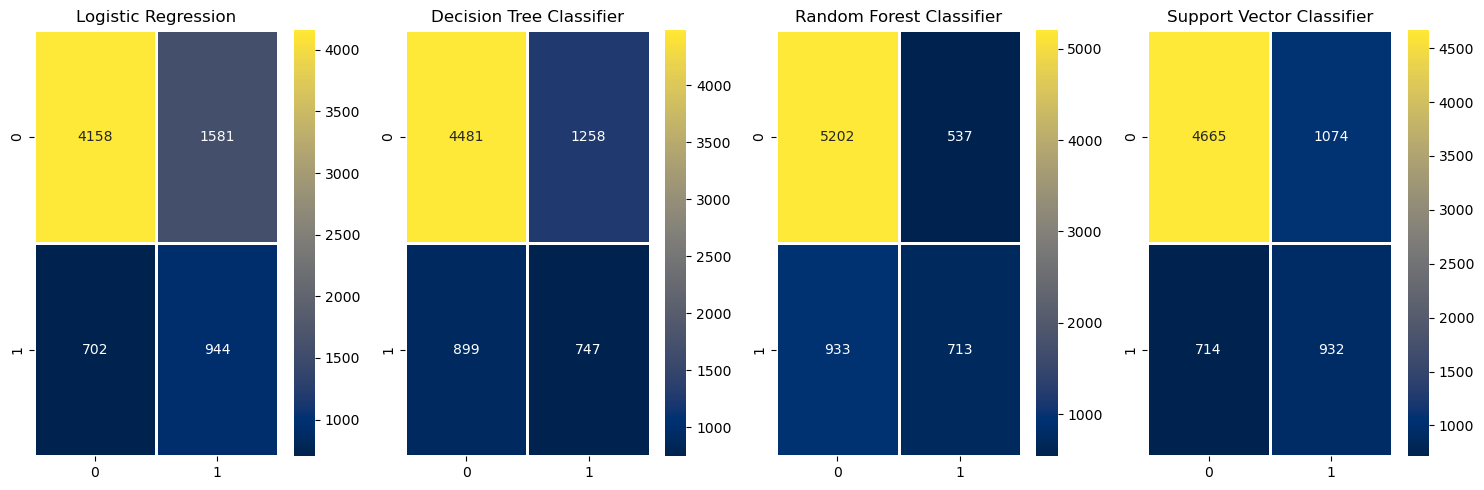

In [138]:
# Visualisation of confusion matrix

selected_models = {'Logistic Regression':LogisticRegression(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier':SVC()}
index=1
plt.figure(figsize=(15,5))
for name, model in selected_models.items():
    model.fit(X_train_scaled_resampled,y_train_resample)               # training the model
    y_pred=model.predict(X_test_scaled)                               # Predicting the value
    
    cm= confusion_matrix(y_test,y_pred)                               # Confusion matrix is called
    print("Confusion Matrix of",name)
    print(cm)
    
#Visualising the matrix
    plt.subplot(1,4,index)
    index+=1
    sns.heatmap(cm,annot=True,cmap='cividis',fmt='d',linewidth=1)
    plt.title(f"{name}")
print(f"\n\nConfusion Matrix Visualisation")
plt.tight_layout()
plt.show()

### Comment:
False Postive- Random Forest flags less non defaulters as defaulter than Logistic regression.

False Negative-Logistic Regression missed only few defaulters than Random Forest.

## 12.Performing Hypertuning to improve efficiency

### Random Forest Classifier

In [161]:
# Finding best paramter using Grid Search CV
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)                               # Object created

# Assigning values to paramter grid
n_estimators=[25,50,75,100]                              # no of trees in the Random Forest          
criterion=['gini','entropy']                             # how to split data at node
max_depth=[3,5,10]                                       # no of levels

#passing parameter
parameters={"n_estimators":n_estimators,'criterion':criterion,'max_depth':max_depth}


# Hyper parameter Tuning
RFC_class=GridSearchCV(rfc,parameters,scoring="recall")                   # initializing gridsearch
RFC_class.fit(X_train_scaled_resampled,y_train_resample)                 # fitting using resampled data

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='recall')

In [163]:
RFC_class.best_params_                                   # Finding best paramter

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 75}

In [167]:
# Passing the best values and fitting
RFC_htune=RandomForestClassifier(n_estimators=75,criterion='gini',max_depth=10)
RFC_htune.fit(X_train_scaled_resampled,y_train_resample)

RandomForestClassifier(max_depth=10, n_estimators=75)

In [169]:
# prediction after hypertuning
y_predt=RFC_htune.predict(X_test_scaled)
y_predt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [171]:
# Classification report after tuning and training with best parameter
print("\nClassification Report after tuning ")
print("\nRandom Forest Classifier\n\n",classification_report(y_test,y_predt))


Classification Report after tuning 

Random Forest Classifier

               precision    recall  f1-score   support

           0       0.86      0.88      0.87      5739
           1       0.54      0.52      0.53      1646

    accuracy                           0.80      7385
   macro avg       0.70      0.70      0.70      7385
weighted avg       0.79      0.80      0.79      7385



After hyperparameter tuning the Random Forest Classifier model performance has increased interms of all paramters.Hence,we may considered Random Forest Classifier Model as the best performance model and can be considered for predictions.

In [174]:
X_train_scaled_resampled = pd.DataFrame(X_train_scaled_resampled,columns=X_train_resample.columns,index=X_train_resample.index)

In [176]:
print(X_train_scaled_resampled.columns)               

Index(['LIMIT_BAL', 'SEX', 'AGE', 'REPAYMENT-SEPT', 'REPAYMENT-AUG',
       'REPAYMENT-JULY', 'REPAYMENT-JUNE', 'REPAYMENT-MAY', 'REPAYMENT-APRIL',
       'BILL_AMT-SEPT', 'BILL_AMT-AUG', 'BILL_AMT-JULY', 'AMT_PAID-SEPT',
       'AMT_PAID-AUG', 'AMT_PAID-JULY', 'AMT_PAID-JUNE', 'AMT_PAID-MAY',
       'AMT_PAID-APRIL', 'MARRIAGE_2', 'MARRIAGE_3', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4'],
      dtype='object')


## 13.Prediction based on findings:

In [179]:
# Case 1 :Prediction on data from dataset itself

customer1=[[120000,1,27,2,-1,-1,-1,2,-1,390,390,390,390,390,780,0,930,300,0,0,0,0,1]]    # Passing input feature of the customer
scaled=ss.transform(customer1)                                                          # Scaling input feature
prediction=RFC_htune.predict(scaled)                                                   # Make prediction using the trained Random Forest Classifier
if prediction[0]==0:                                                                   
    print("Customer will not default")
else:
    print("Customer will default the payment")


Customer will not default


In [181]:
# Case 2: Customer not utilized the facility
customer2=[[120000,0,33,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1,0]]           # Passing input feature of the customer
scaled=ss.transform(customer2)                                                     # Scaling input feature
prediction=RFC_htune.predict(scaled)                                              # Make prediction using the trained Random Forest Classifier
if prediction[0]==0:
    print("Customer will not default")
else:
    print("Customer will default the payment")

Customer will default the payment


In [183]:
# Case 3: Customer paid on time
customer3=[[120000,1,33,-1,-1,-1,-1,-1,-1,1000,2000,3000,1000,2000,3000,4000,5000,6000,0,0,0,0,1]]   # Passing input feature of the customer
scaled=ss.transform(customer3)                                                                        # Scaling input feature
prediction=RFC_htune.predict(scaled)                                                                  # Make prediction using the trained Random Forest Classifier
if prediction[0]==0:
    print("Customer will not default")
else:
    print("Customer will default the payment")

Customer will not default


In [185]:
# Case 4: Customer always pays on time but pays only partial amount
customer4=[[10000,0,23,-1,-1,-1,-1,-1,0,1000,2000,3000,100,200,300,0,200,300,0,1,1,0,0]]   # Passing input feature of the customer
scaled=ss.transform(customer4)                                                             # Scaling input feature
prediction=RFC_htune.predict(scaled)                                                       # Make prediction using the trained Random Forest Classifier
if prediction[0]==0:
    print("Customer will not default")
else:
    print("Customer will default the payment")


Customer will not default


In [187]:
# Case 5: Customer always delayed payment and pays only partial amount
customer5=[[1000,0,22,2,1,1,2,2,2,1000,2000,3000,100,200,300,0,0,0,0,1,1,0,0]]    # Passing input feature of the customer
scaled=ss.transform(customer5)                                                     # Scaling input feature
prediction=RFC_htune.predict(scaled)                                               # Make prediction using the trained Random Forest Classifier
if prediction[0]==0:
    print("Customer will not default")
else:
    print("Customer will default the payment")

Customer will default the payment


In [189]:
# Case 6: Customer always delayed payment and pays full amount
customer6=[[100000,0,42,2,1,1,2,2,2,1000,2000,3000,1000,2000,3000,100,200,300,0,1,1,0,0]]    # Passing input feature of the customer
scaled=ss.transform(customer6)                                                                # Scaling input feature
prediction=RFC_htune.predict(scaled)                                                          # Make prediction using the trained Random Forest Classifier
if prediction[0]==0:
    print("Customer will not default")
else:
    print("Customer will default the payment")

Customer will default the payment
